# De Simpsons revisited

In [7]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import six

sys.modules['sklearn.externals.six'] = six
from IPython.display import display
import scipy.stats as stats
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import DistanceMetric


In deze oefening willen we nagaan welke soorten Simpsons er zijn. Hiervoor gebruiken we de oorspronkelijke data (waarbij de attributen continu zijn).
Je vindt deze in "simpsons.csv".

1. Lees het bestand in, wis de kolommen "naam" en "geslacht" want deze zijn nominaal.

In [6]:
import pandas as pd

simpsons = pd.read_csv("datasets/simpsons origineel.csv")
# we gaan namen vergelijken daarom handig om namen als index te gebruiken
simpsons.index = simpsons.naam
simpsons = simpsons.drop(['naam', 'geslacht'], axis=1)
simpsons.info()
print(simpsons.head(10))

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, Homer to Krusty
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   haarlengte  9 non-null      int64
 1   gewicht     9 non-null      int64
 2   leeftijd    9 non-null      int64
dtypes: int64(3)
memory usage: 288.0+ bytes
        haarlengte  gewicht  leeftijd
naam                                 
Homer            0      250        36
Marge           10      150        34
Bart             2       90        10
Lisa             6       78         8
Maggie           4       20         1
Abe              1      170        70
Selma            8      160        41
Otto            10      180        38
Krusty           6      200        45


2. Bepaal de euclidische afstanden tussen de Simpsons.

In [8]:
afstand_eu = pd.DataFrame(data=cdist(simpsons, simpsons), columns=simpsons.index.values, index=simpsons.index.values)
display(afstand_eu)

# alternatief
dist_obj = DistanceMetric.get_metric('euclidean')
afstand_eu = pd.DataFrame(data=dist_obj.pairwise(simpsons), columns=simpsons.index.values, index=simpsons.index.values)
display(afstand_eu)

,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
Homer,0.000000,100.518655,162.111073,174.367428,232.682187,86.931007,90.493094,70.738957,51.156622
Marge,100.518655,0.000000,65.115282,76.655072,134.257216,42.154478,12.369317,30.265492,51.351728
Bart,162.111073,65.115282,0.000000,12.806248,70.604532,100.005000,76.791927,94.593869,115.503247
Lisa,174.367428,76.655072,12.806248,0.000000,58.455111,111.054041,88.413800,106.395489,127.487254
Maggie,232.682187,134.257216,70.604532,58.455111,0.000000,165.136307,145.657132,164.331981,185.310550
Abe,86.931007,42.154478,100.005000,111.054041,165.136307,0.000000,31.464265,34.713110,39.370039
Selma,90.493094,12.369317,76.791927,88.413800,145.657132,31.464265,0.000000,20.322401,40.249224
Otto,70.738957,30.265492,94.593869,106.395489,164.331981,34.713110,20.322401,0.000000,21.563859
Krusty,51.156622,51.351728,115.503247,127.487254,185.310550,39.370039,40.249224,21.563859,0.000000


,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
Homer,0.000000,100.518655,162.111073,174.367428,232.682187,86.931007,90.493094,70.738957,51.156622
Marge,100.518655,0.000000,65.115282,76.655072,134.257216,42.154478,12.369317,30.265492,51.351728
Bart,162.111073,65.115282,0.000000,12.806248,70.604532,100.005000,76.791927,94.593869,115.503247
Lisa,174.367428,76.655072,12.806248,0.000000,58.455111,111.054041,88.413800,106.395489,127.487254
Maggie,232.682187,134.257216,70.604532,58.455111,0.000000,165.136307,145.657132,164.331981,185.310550
Abe,86.931007,42.154478,100.005000,111.054041,165.136307,0.000000,31.464265,34.713110,39.370039
Selma,90.493094,12.369317,76.791927,88.413800,145.657132,31.464265,0.000000,20.322401,40.249224
Otto,70.738957,30.265492,94.593869,106.395489,164.331981,34.713110,20.322401,0.000000,21.563859
Krusty,51.156622,51.351728,115.503247,127.487254,185.310550,39.370039,40.249224,21.563859,0.000000


3. Welke Simpsons zijn het dichtst bij elkaar?

In [9]:
afstandenSimpsons = pd.DataFrame([[afstand_eu.loc[naamr, naamk], naamk, naamr] for naamr in afstand_eu.columns for naamk in afstand_eu.columns if
     naamr != naamk], columns=["afstand", "naam1", "naam2"])
print(afstandenSimpsons.sort_values(by=["afstand"]))
#marge en selma

       afstand   naam1   naam2
49   12.369317   Marge   Selma
13   12.369317   Selma   Marge
26   12.806248    Bart    Lisa
18   12.806248    Lisa    Bart
54   20.322401    Otto   Selma
..         ...     ...     ...
2   174.367428    Lisa   Homer
68  185.310550  Maggie  Krusty
39  185.310550  Krusty  Maggie
3   232.682187  Maggie   Homer
32  232.682187   Homer  Maggie

[72 rows x 3 columns]


4. Wat is de Manhattan afstand tussen Homer en Bart?

In [10]:
afstand_eu = pd.DataFrame(data=cdist(simpsons, simpsons, metric="cityblock"), columns=simpsons.index.values, index=simpsons.index.values)
display(afstand_eu)
# 188

,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
Homer,0.0,112.0,188.0,206.0,269.0,115.0,103.0,82.0,65.0
Marge,112.0,0.0,92.0,102.0,169.0,65.0,19.0,34.0,65.0
Bart,188.0,92.0,0.0,18.0,81.0,141.0,107.0,126.0,149.0
Lisa,206.0,102.0,18.0,0.0,67.0,159.0,117.0,136.0,159.0
Maggie,269.0,169.0,81.0,67.0,0.0,222.0,184.0,203.0,226.0
Abe,115.0,65.0,141.0,159.0,222.0,0.0,46.0,51.0,60.0
Selma,103.0,19.0,107.0,117.0,184.0,46.0,0.0,25.0,46.0
Otto,82.0,34.0,126.0,136.0,203.0,51.0,25.0,0.0,31.0
Krusty,65.0,65.0,149.0,159.0,226.0,60.0,46.0,31.0,0.0


5. Wat is de gestandaardiseerde euclidische afstand tussen Marge en Maggie?

In [11]:
afstand_eu = pd.DataFrame(data=cdist(simpsons, simpsons, metric="seuclidean"), columns=simpsons.index.values,
                          index=simpsons.index.values)
display(afstand_eu)
# 2.975943

# of
simpsons_Z = pd.DataFrame(data=stats.zscore(simpsons, axis=0), columns=simpsons.columns.values,
                          index=simpsons.index.values)
simpsons_Z.gewicht.mean()
simpsons_Z.gewicht.std()
simpsons_Z.leeftijd.mean()
simpsons_Z.leeftijd.std()
simpsons_Z['haarlengte'].mean()
simpsons_Z['haarlengte'].std()
afstandZ_eu = pd.DataFrame(data=cdist(simpsons_Z, simpsons_Z), columns=simpsons_Z.index.values,
                           index=simpsons_Z.index.values)
display(afstandZ_eu)



,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
Homer,0.000000,3.129265,2.714563,3.303446,3.927929,2.017076,2.585639,2.947674,1.861902
Marge,3.129265,0.000000,2.637183,1.966131,2.975943,3.030141,0.661020,0.480447,1.425834
Bart,2.714563,2.637183,0.000000,1.122187,1.244079,3.095406,2.443563,2.897863,2.569145
Lisa,3.303446,1.966131,1.122187,0.000000,1.069204,3.522388,2.053327,2.345299,2.511692
Maggie,3.927929,2.975943,1.244079,1.069204,0.000000,4.036536,3.011513,3.371988,3.417952
Abe,2.017076,3.030141,3.095406,3.522388,4.036536,0.000000,2.377446,2.916041,1.873348
Selma,2.585639,0.661020,2.443563,2.053327,3.011513,2.377446,0.000000,0.641586,0.828899
Otto,2.947674,0.480447,2.897863,2.345299,3.371988,2.916041,0.641586,0.000000,1.190043
Krusty,1.861902,1.425834,2.569145,2.511692,3.417952,1.873348,0.828899,1.190043,0.000000


,Homer,Marge,Bart,Lisa,Maggie,Abe,Selma,Otto,Krusty
Homer,0.000000,3.219987,2.793262,3.399218,4.041806,2.075554,2.660600,3.033132,1.915881
Marge,3.219987,0.000000,2.713639,2.023132,3.062220,3.117990,0.680184,0.494376,1.467171
Bart,2.793262,2.713639,0.000000,1.154721,1.280147,3.185147,2.514406,2.981876,2.643629
Lisa,3.399218,2.023132,1.154721,0.000000,1.100202,3.624507,2.112856,2.413293,2.584509
Maggie,4.041806,3.062220,1.280147,1.100202,0.000000,4.153561,3.098822,3.469747,3.517043
Abe,2.075554,3.117990,3.185147,3.624507,4.153561,0.000000,2.446372,3.000581,1.927660
Selma,2.660600,0.680184,2.514406,2.112856,3.098822,2.446372,0.000000,0.660186,0.852930
Otto,3.033132,0.494376,2.981876,2.413293,3.469747,3.000581,0.660186,0.000000,1.224545
Krusty,1.915881,1.467171,2.643629,2.584509,3.517043,1.927660,0.852930,1.224545,0.000000


6. Maak nu een dendrogram (gebruik euclidische afstanden)


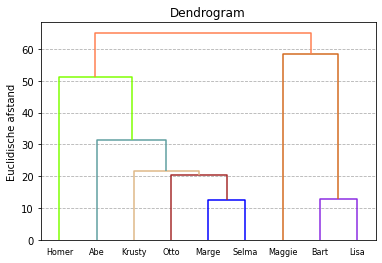

In [12]:
def plot_dendrogram(dataset, hor=True):
    colors = list(matplotlib.colors.cnames.keys())
    ax = plt.axes()
    distances = linkage(dataset, method='single')
    ax.set_title("Dendrogram")
    ax.set_ylabel('Euclidische afstand')
    ax.grid(linestyle='--', axis='y')
    if (hor):
        orient = 'right'
    else:
        orient = 'top'
    dgram = dendrogram(distances, labels=dataset.index.values,
                       link_color_func=lambda x: colors[x % len(colors)],
                       leaf_font_size=8., ax=ax, orientation=orient)
    plt.show()


plot_dendrogram(simpsons, False)

7. Als je 2 clusters zou moeten selecteren uit deze boom, welke zijn dat dan? Hoe zou je die clusters benoemen?

In [21]:
# kinderen en volwassenen
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
cluster.fit(simpsons)
simpsons['cluster_with_2'] = cluster.labels_
print(simpsons)

        haarlengte  gewicht  leeftijd  cluster_with_2
naam                                                 
Homer            0      250        36               1
Marge           10      150        34               1
Bart             2       90        10               0
Lisa             6       78         8               0
Maggie           4       20         1               0
Abe              1      170        70               1
Selma            8      160        41               1
Otto            10      180        38               1
Krusty           6      200        45               1


8. Maak een scatterplot van de Simpsons waarbij je in de X-as leeftijd zet en in de Y-as het gewicht. Gebruik het clusternummer voor de kleur.


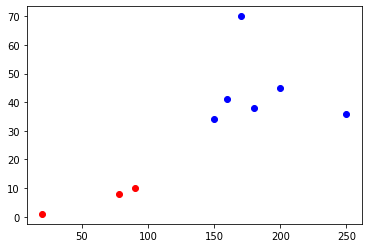

In [22]:
ax = plt.axes()
cluster0 = simpsons[simpsons.cluster_with_2 == 0]
cluster1 = simpsons[simpsons.cluster_with_2 == 1]
ax.scatter(x=cluster0.gewicht, y=cluster0.leeftijd, color="red")
ax.scatter(x=cluster1.gewicht, y=cluster1.leeftijd, color="blue")

9. Bepaal nu 3 clusters uit de boom en maak weer een plot. Welke Simpsons zitten nu in welke categorie?

In [23]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit(simpsons)
simpsons['cluster_with_3'] = cluster.labels_
print(simpsons)

        haarlengte  gewicht  leeftijd  cluster_with_2  cluster_with_3
naam                                                                 
Homer            0      250        36               1               2
Marge           10      150        34               1               1
Bart             2       90        10               0               0
Lisa             6       78         8               0               0
Maggie           4       20         1               0               0
Abe              1      170        70               1               1
Selma            8      160        41               1               1
Otto            10      180        38               1               1
Krusty           6      200        45               1               1


10. Probeer nu 2 clusters te maken met het k-means algoritme. Kijk naar de centroids. In welke coördinaten verschillen deze centroids het meest?

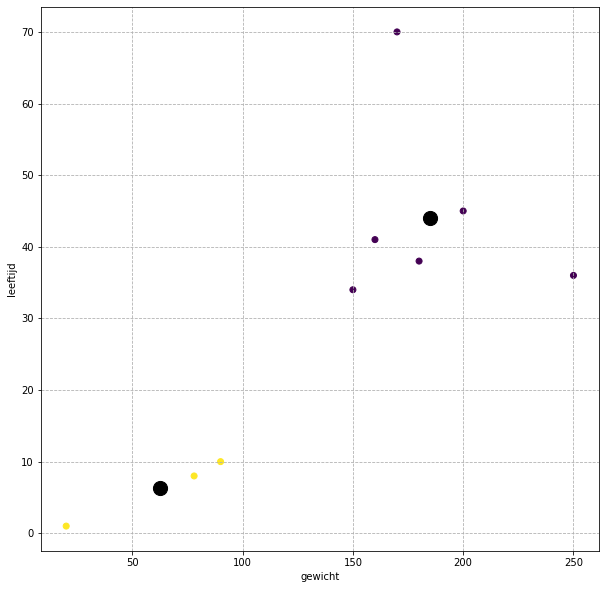

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

model = KMeans(n_clusters=2)
model.fit(simpsons)
model.labels_
#plotten van de data
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(simpsons.gewicht, simpsons.leeftijd, c=model.labels_)
ax.scatter(model.cluster_centers_[:, 1],
           model.cluster_centers_[:, 2], c='black', s=200)
ax.set_xlabel("gewicht")
ax.set_ylabel("leeftijd")
ax.grid(linestyle='--')


11.Kan je een beslissingsboom opstellen die bepaalt in welke cluster een Simpson valt?
Maak hiertoe een kolom bij waarin het clusternummer staat en gebruik DecisionTreeClassifier om de boom op te stellen.

[Text(167.4, 163.07999999999998, 'leeftijd <= 22.0\nentropy = 0.918\nsamples = 9\nvalue = [6, 3]\nclass = cluster 0'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = cluster 1'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = cluster 0')]

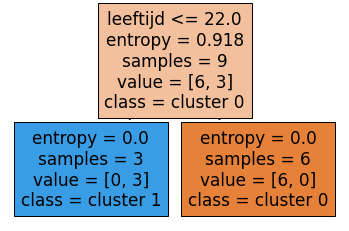

In [26]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(simpsons.drop(['cluster_with_3', 'cluster_with_2'], axis=1), model.labels_)

_ = tree.plot_tree(classifier, feature_names=['haarlengte', 'gewicht', 'leeftijd'],
               class_names=['cluster {}'.format(i) for i in np.unique(model.labels_)],
               filled=True)